Hypothesis Testing Case Study

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [4]:
cust = pd.read_csv("E:\AI\ALabs\Python - ML\DataSets\Cust_seg.csv")
cust.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [15]:
#assignment 1:
mean = cust.Latest_mon_usage.mean()
mean

63.174

In [16]:
std = cust.Latest_mon_usage.std()
std

11.242137352892756

In [21]:
#step1: Sample represents the population (Assumption)
#step2: H0 hypothesis: Last Year mean  = latest_mon_usage
#step3: Applying One Sample t-test as we have last year sample mean, and looking for current month mean
ttest1 = stats.ttest_1samp(a=cust.Latest_mon_usage,popmean=50)
ttest1

Ttest_1sampResult(statistic=16.57233752433133, pvalue=2.4963719280931583e-39)

In [22]:
ttest1.pvalue<0.05

True

In [23]:
#So, we can say that we failed to accept the null hypothesis.
#ttest1 says that it has an influence over the result compared to last year.

In [24]:
#Asssignment 2: Applying 2 sample t-test
ttest2 = stats.ttest_rel(a=cust.pre_usage,b=cust.Post_usage_1month)
ttest2

Ttest_relResult(statistic=-0.8673065458794775, pvalue=0.3868186820914985)

In [25]:
ttest2.pvalue<0.05

False

In [26]:
#We accept null hypothesis. So, no impact of campaign after one month.

In [27]:
ttest2_2ndmonth = stats.ttest_rel(a=cust.pre_usage,b=cust.post_usage_2ndmonth)
ttest2_2ndmonth

Ttest_relResult(statistic=-8.866832246938742, pvalue=4.295733828012836e-16)

In [28]:
ttest2_2ndmonth.pvalue<0.05

True

In [29]:
#We reject the null hypothesis here. SO, there is an impact of campaign after 2 months.

In [31]:
#Assignment 3: Applying Independent t-test
males_spend = cust.Post_usage_1month.loc[(cust.sex==0)]
females_spend = cust.Post_usage_1month.loc[(cust.sex==1)]
ttest3 = stats.ttest_ind(a=males_spend,b=females_spend)
ttest3

Ttest_indResult(statistic=-3.7340738531536797, pvalue=0.00024625461203549315)

In [32]:
ttest3.pvalue<0.05

True

In [33]:
#Null Hypothesis is rejected. SO, there is a difference of males/females caredit card usage.

In [34]:
#Assignmenmt 4:
#Need to apply ANOVA
cust.segment.value_counts()

2    105
3     50
1     45
Name: segment, dtype: int64

In [35]:
s1 = cust.Latest_mon_usage.loc[cust.segment==1]
s2 = cust.Latest_mon_usage.loc[cust.segment==2]
s3 = cust.Latest_mon_usage.loc[cust.segment==3]

In [38]:
#Performing ANOVA
anova_test = stats.f_oneway(s1,s2,s3)
anova_test

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

In [39]:
anova_test.pvalue<0.05

True

In [40]:
#Null Hypothesis is rejected. SO, there is a difference of segments card usage.

In [42]:
#Chi-square:
seg_reg_xtab = pd.crosstab(cust.segment,cust.region,margins=True)
chi_test = stats.chi2_contingency(observed=seg_reg_xtab)
chi_test

(16.60444164948934,
 0.055282939487992365,
 9,
 array([[ 10.575,  21.375,  13.05 ,  45.   ],
        [ 24.675,  49.875,  30.45 , 105.   ],
        [ 11.75 ,  23.75 ,  14.5  ,  50.   ],
        [ 47.   ,  95.   ,  58.   , 200.   ]]))

In [43]:
0.055282939487992365<0.05

False

In [44]:
#Accepting Null Hypothesis. No relationship.

In [45]:
#Assignment 6: 
cust.pre_usage.corr(other=cust.Post_usage_1month)

0.5967764790880451

In [46]:
cust.corr()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
custid,1.000000,-0.087217,0.748793,0.210912,0.482383,-0.058029,0.148620,0.186688,0.219234,0.186688
sex,-0.087217,1.000000,0.001259,-0.125009,0.015337,0.004009,-0.053084,0.256492,-0.029338,0.256492
AqChannel,0.748793,0.001259,1.000000,0.195364,0.108386,-0.050060,0.243400,0.219999,0.202553,0.219999
region,0.210912,-0.125009,0.195364,1.000000,0.136673,0.017333,0.293322,0.207494,0.272459,0.207494
Marital_status,0.482383,0.015337,0.108386,0.136673,1.000000,-0.095050,0.086201,0.127228,0.098309,0.127228
segment,-0.058029,0.004009,-0.050060,0.017333,-0.095050,1.000000,-0.134973,-0.181107,-0.150104,-0.181107
pre_usage,0.148620,-0.053084,0.243400,0.293322,0.086201,-0.134973,1.000000,0.596776,0.662280,0.596776
Post_usage_1month,0.186688,0.256492,0.219999,0.207494,0.127228,-0.181107,0.596776,1.000000,0.617449,1.000000
Latest_mon_usage,0.219234,-0.029338,0.202553,0.272459,0.098309,-0.150104,0.662280,0.617449,1.000000,0.617449
post_usage_2ndmonth,0.186688,0.256492,0.219999,0.207494,0.127228,-0.181107,0.596776,1.000000,0.617449,1.000000


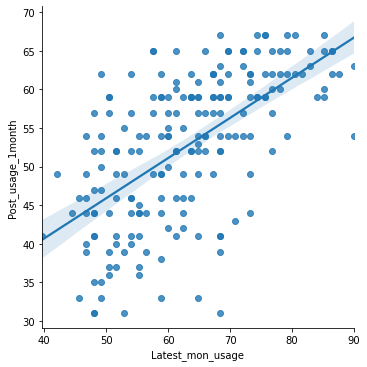

In [47]:
import seaborn as sns 
sns.lmplot(x="Latest_mon_usage",y="Post_usage_1month",data = cust)